In [61]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

importlib.reload(classes) 
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\functions.py'>

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

nodes_list = [8,16,32,64]
activations = [reLU, sigmoid, leaky_reLU]
activation_ders = [ReLU_der, sigmoid_der, leaky_reLU_der]
acc = np.zeros((len(activations), len(nodes_list)))
n_layers = 3

for a, A in enumerate(activations):
    for j, N in enumerate(nodes_list):
        ders = activation_ders[a]

        Classifier = NeuralNetwork(X_train.shape[1], [N, N, N, 10], [A]*n_layers + [softmax], [ders]*n_layers + [softmax_der], cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, epochs=20, learning_rate=0.1, batch_size=4048, functional=NN_ADAM)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = round(np.mean(y_test == y_pred_label),4)
        acc[a,j] = accuracy
        print(f"Accuracy for {A.__name__} layers and {N} nodes: {accuracy}")

Accuracy for reLU layers and 8 nodes: 0.1151
Accuracy for reLU layers and 16 nodes: 0.1151
Accuracy for reLU layers and 32 nodes: 0.3419
Accuracy for reLU layers and 64 nodes: 0.3209
Accuracy for sigmoid layers and 8 nodes: 0.8871
Accuracy for sigmoid layers and 16 nodes: 0.9071
Accuracy for sigmoid layers and 32 nodes: 0.9314
Accuracy for sigmoid layers and 64 nodes: 0.9086
Accuracy for leaky_reLU layers and 8 nodes: 0.8226
Accuracy for leaky_reLU layers and 16 nodes: 0.442
Accuracy for leaky_reLU layers and 32 nodes: 0.5097
Accuracy for leaky_reLU layers and 64 nodes: 0.3137


Showing vanishing and exploding gradients

In [8]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)
n = 3

Classifier = NeuralNetwork(X_train.shape[1], [4,4,4,10], [reLU]*n + [softmax], [ReLU_der]*n + [softmax_der], cross_entropy, cross_entropy_der)
Classifier.train_SGD(X_train, Y_train, epochs=1, learning_rate=0.1, batch_size=4048)

Classifier.weights


[(array([[ 0.86628366,  0.19724759,  1.2658984 ,  0.3597783 ],
         [ 2.71668874, -1.9835166 ,  1.01022525, -0.02469936],
         [ 0.39934902, -0.16969816,  1.66620488,  0.85454966],
         ...,
         [-0.87389265, -0.29806071, -0.32858425, -0.84579841],
         [-0.83302473, -1.14883815,  0.83570609, -1.15930411],
         [ 0.35848361, -0.18000859,  1.09111588,  0.95519276]],
        shape=(784, 4)),
  array([[ 1.66376513, -0.84836338,  1.30127891,  0.29089876]])),
 (array([[ 0.18302234,  0.08760515, -0.8628304 ,  0.04266914],
         [-1.03103138, -1.05526935, -2.23110319, -1.54218936],
         [-0.90180958, -1.2670801 , -0.35020717, -1.83924585],
         [-1.07725663, -0.10395669,  1.16471197, -0.7137554 ]]),
  array([[0.79406561, 0.51324548, 0.56438934, 0.87318186]])),
 (array([[-2.18117314, -1.85833572,  0.87074449,  0.14999818],
         [-0.97767114,  1.0853245 ,  0.74889941,  0.39439154],
         [-0.04819924, -0.47100412, -2.44590643, -0.98806094],
         [ 

In [14]:
state=50
datapoints=1000
noise_std=0.01

X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(state, datapoints, noise_std)
n = 3

Classifier = NeuralNetwork(X_train.shape[1], [4,4,4,10], [reLU]*n + [identity], [ReLU_der]*n + [identity], cross_entropy, cross_entropy_der)
Classifier.train_SGD(X_train, Y_train, epochs=3, learning_rate=0.1, batch_size=4048)

Classifier.weights

C:\Users\Jogga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\linalg\_linalg.py:2791: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\classes.py:34: RuntimeWarning: overflow encountered in matmul
  z = np.matmul(a, W) + b


[(array([[ 1.02001938e+171,  3.49769432e+170, -1.89932746e-001,
           1.53243555e+171]]),
  array([[ 9.31909028e+170,  3.19555977e+170, -1.23762418e+000,
           1.40006215e+171]])),
 (array([[ 1.16963529e+000,  4.94613954e+170,  1.37693251e+000,
           8.33336604e-001],
         [-4.77249166e-001,  2.21635541e+171, -1.23492908e+000,
          -1.49434525e+000],
         [-5.48373242e-001, -7.79441136e-001, -1.80270797e-001,
          -2.02634952e+000],
         [-1.73108202e+000,  1.43212776e+171, -1.30885804e+000,
          -1.03648806e+000]]),
  array([[-1.92455080e+008,  2.89639473e+155, -1.35032779e+000,
          -2.00332316e+000]])),
 (array([[-1.97643741e-001,  7.12235340e+005,  3.36639273e-001,
           1.50622294e+006],
         [-4.17892663e-001,  1.45666156e+171, -1.42159380e+000,
           7.99740366e+170],
         [ 6.36690099e-001, -5.36095863e-001,  5.59057936e-001,
          -4.62764121e-001],
         [-1.94187567e-001, -3.68764634e-001, -1.22135018e+0

In [52]:
import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)
digits = datasets.load_digits()
data = digits.images
target = digits.target
n_inputs = len(data)
inputs = data.reshape(n_inputs, -1)

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)
print(X_train.shape[0])

1437


Testing for best set {epochs, $\eta$} for SGD using reLU. Simply use batch_size=X_train.shape[0] to run full batch. The heatmap below shows Plain GD for reLU

In [32]:
epochs = [20,50,100,200,500]
etas = [1e-5, 1e-4,1e-3, 1e-2, 1e-1]
bathes = [16,32,64,128,256]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=False)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}")

Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1333. Batchsize=16
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.15. Batchsize=32
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.0917. Batchsize=64
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1333. Batchsize=128
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1778. Batchsize=256
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.6167. Batchsize=16
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.4167. Batchsize=32
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1556. Batchsize=64
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1778. Batchsize=128
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1361. Batchsize=256
Accuracy for 20 epochs and learning rate 0.001, with accuracy: 0.8806. Batchsize=16
Accuracy for 20 epochs and learning rate 0.001, with accuracy: 0.8417

Overall, batchsize 32 works the best for SGD using reLU with learning rate 0.01

C:\Users\Jogga\AppData\Local\Temp\ipykernel_81128\164368077.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


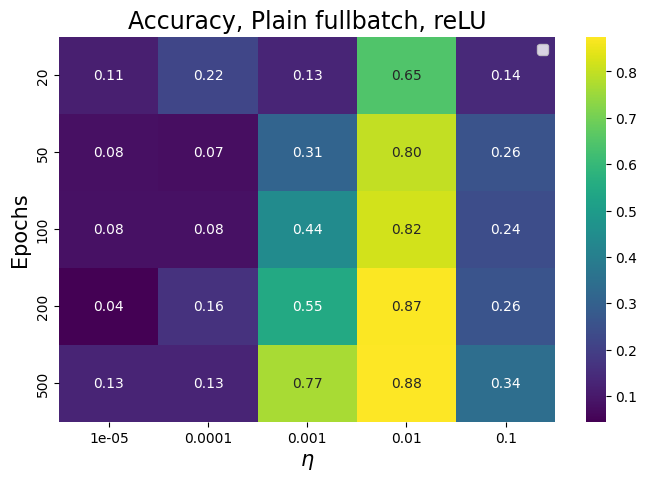

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax, xticklabels=etas, yticklabels=epochs)
ax.set_xlabel(r"$\eta$", fontsize=15)
ax.set_ylabel("Epochs", fontsize=15)
ax.set_title(r"Accuracy, Plain fullbatch, reLU", fontsize=17)
ax.legend()

SGD with sigmoid as activation function

In [33]:
epochs = [20,50,100,200,500]
etas = [1e-5, 1e-4,1e-3, 1e-2, 1e-1]
bathes = [16,32,64,128,256]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [sigmoid, softmax], [sigmoid_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=False)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}")

Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1194. Batchsize=16
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1167. Batchsize=32
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1222. Batchsize=64
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.0306. Batchsize=128
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1056. Batchsize=256
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0972. Batchsize=16
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0806. Batchsize=32
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0722. Batchsize=64
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0972. Batchsize=128
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0528. Batchsize=256
Accuracy for 20 epochs and learning rate 0.001, with accuracy: 0.2444. Batchsize=16
Accuracy for 20 epochs and learning rate 0.001, with accuracy: 0.11

As we can see, the best batchsize for SGD with sigmoid is 16 with learning rate 0.1. We now do the same analysis for tanh

In [50]:
epochs = [200,500,1000]
etas = [1e-2, 1e-1, 2e-1]
bathes = [16,32,64,128,256]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [tanh, softmax], [tanh_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=False)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}")

Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.8194. Batchsize=16
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.8417. Batchsize=32
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.775. Batchsize=64
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.7278. Batchsize=128
Accuracy for 200 epochs and learning rate 0.01, with accuracy: 0.6694. Batchsize=256
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.9222. Batchsize=16
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.9083. Batchsize=32
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.9111. Batchsize=64
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.8611. Batchsize=128
Accuracy for 200 epochs and learning rate 0.1, with accuracy: 0.8333. Batchsize=256
Accuracy for 200 epochs and learning rate 0.2, with accuracy: 0.95. Batchsize=16
Accuracy for 200 epochs and learning rate 0.2, with accuracy: 0.9306. Batchsize=3

In [44]:
epochs = [20,50,100,200,500]
etas = [1e-5, 1e-4,1e-3, 1e-2, 1e-1]
bathes = [64,128,256,512,1024]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD_v2(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=NN_RMS)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}")

Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.0964. Batchsize=64
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1001. Batchsize=128
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.0791. Batchsize=256
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.0871. Batchsize=512
Accuracy for 20 epochs and learning rate 1e-05, with accuracy: 0.1168. Batchsize=1024
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1335. Batchsize=64
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1019. Batchsize=128
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0687. Batchsize=256
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.0939. Batchsize=512
Accuracy for 20 epochs and learning rate 0.0001, with accuracy: 0.1024. Batchsize=1024
Accuracy for 20 epochs and learning rate 0.001, with accuracy: 0.1528. Batchsize=64
Accuracy for 20 epochs and learning rate 0.001, with accuracy

KeyboardInterrupt: 

In [51]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
ClassifierPlain.train_SGD_v2(X_train, Y_train, epochs=200, batch_size=6400, learning_rate=0.01, functional=False)
pred = ClassifierPlain.feed_forward(X_test)
y_pred_label = np.argmax(pred, axis=1)
accuracy = round(np.mean(y_test == y_pred_label),4)
print(accuracy)

KeyboardInterrupt: 

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
Y_train, Y_test = onehot(y_train), onehot(y_test)

In [ ]:
epochs = [500,2000]
etas = [1e-1, 2e-1, 5e-1]
bathes = [32,64,1280]

acc = np.empty((len(epochs), len(etas)))
for i, epoch in enumerate(epochs):
    for e, eta in enumerate(etas):
        for b, batch in enumerate(bathes):
            start = time.perf_counter()
            ClassifierPlain = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
            ClassifierPlain.train_SGD_v2(X_train, Y_train, epochs=epoch, batch_size=batch, learning_rate=eta, functional=False)
            pred = ClassifierPlain.feed_forward(X_test)
            y_pred_label = np.argmax(pred, axis=1)
            accuracy = round(np.mean(y_test == y_pred_label),4)
            end = time.perf_counter()
            time_iter = end - start
            #acc[i,e] = accuracy
            print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Batchsize={batch}, with time {round(time_iter, 4)}. Act: {}")

Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.3583. Batchsize=32, with time 0.5673
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.2083. Batchsize=64, with time 0.5482
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.5333. Batchsize=1280, with time 1.4025
Accuracy for 500 epochs and learning rate 0.2, with accuracy: 0.0972. Batchsize=32, with time 0.5433
Accuracy for 500 epochs and learning rate 0.2, with accuracy: 0.3. Batchsize=64, with time 0.5445
Accuracy for 500 epochs and learning rate 0.2, with accuracy: 0.2361. Batchsize=1280, with time 1.2911
Accuracy for 500 epochs and learning rate 0.5, with accuracy: 0.0806. Batchsize=32, with time 0.5088
Accuracy for 500 epochs and learning rate 0.5, with accuracy: 0.0972. Batchsize=64, with time 0.5157
Accuracy for 500 epochs and learning rate 0.5, with accuracy: 0.1639. Batchsize=1280, with time 1.2979
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.3167. Batchsize=32, wit

KeyboardInterrupt: 

In [ ]:
ClassifierPlain1 = NeuralNetwork(X_train.shape[1], [50,10], [reLU, softmax], [ReLU_der, softmax_der], cross_entropy, cross_entropy_der)
ClassifierPlain1.train_SGD(X_train, Y_train, epochs=200, batch_size=16, learning_rate=0.01, functional=False)
pred1 = ClassifierPlain1.feed_forward(X_test)
y_pred_label = np.argmax(pred1, axis=1)
accuracy = round(np.mean(y_test == y_pred_label),4)
print(accuracy)

KeyboardInterrupt: 

In [67]:
def GELU(x):
    return 0.5*x *(1+tanh(np.sqrt(2/np.pi)*(x+0.044715*(x**3)))) 
def ELU(x, alpha=0.01):
    return np.where(x < 0, alpha*(np.exp(x)-1), x)


def ELU_der(x, alpha=0.01):
    return np.where(x<0, ELU(x) + alpha, 1)

from scipy.special import erf
def GELU_der(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * np.exp(-x**2 / 2)) / np.sqrt(2 * np.pi)
def tanh(x):
    return np.tanh(x)


def tanh_der(x):
    return 1.0 - np.tanh(x)**2

activation_funcs = [reLU, sigmoid, leaky_reLU, tanh, GELU, ELU]
activation_ders  = [ReLU_der, sigmoid_der, leaky_reLU_der, tanh_der, GELU_der, ELU_der]
nodes_list = [16,32,64,128]
hidden_layers = [1,2,3]
etas = [1e-2,1e-1]
batches = [16,32,64,128]
epochs = [100,500,2000]
mseMatrix = np.zeros((len(hidden_layers),len(nodes_list)))
optimizers = [False, NN_ADAM, NN_RMS]

for h, hidden_layer in enumerate(hidden_layers):
    for n, nodes in enumerate(nodes_list):
        for a, A in enumerate(activation_funcs):
            for e, eta in enumerate(etas):
                for ep, epoch in enumerate(epochs):
                    for o, OPT in enumerate(optimizers):
                        if h == 0:
                            layers, acts, ders = [10], [softmax], [softmax_der]
                        else:
                            layers = [nodes]*h + [10]
                            acts = [A]*h + [softmax]
                            ders = [activation_ders[a]]*h + [softmax_der]
                        start = time.perf_counter()
                        ClassifierPlain = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
                        ClassifierPlain.train_SGD_v2(X_train, Y_train, epochs=epoch, batch_size=64, learning_rate=eta, functional=OPT)
                        pred = ClassifierPlain.feed_forward(X_test)
                        y_pred_label = np.argmax(pred, axis=1)
                        accuracy = round(np.mean(y_test == y_pred_label),4)
                        end = time.perf_counter()
                        time_iter = end - start
                        #acc[i,e] = accuracy
                        print(f"Accuracy for {epoch} epochs and learning rate {eta}, with accuracy: {accuracy}. Time {round(time_iter, 4)}. Act: {A.__name__}, opt: {OPT}, hl: {hidden_layer}, n:{nodes}")

Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.4806. Time 0.114. Act: reLU, opt: False, hl: 1, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.6444. Time 0.088. Act: reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 1, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.6806. Time 0.0704. Act: reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 1, n:16
Accuracy for 500 epochs and learning rate 0.01, with accuracy: 0.8139. Time 0.3758. Act: reLU, opt: False, hl: 1, n:16
Accuracy for 500 epochs and learning rate 0.01, with accuracy: 0.8611. Time 0.3743. Act: reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 1, n:16
Accuracy for 500 epochs and learning rate 0.01, with accuracy: 0.9361. Time 0.3472. Act: reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 1, n:16
Accuracy for 2000 epochs and learning rate 0.01, with accuracy: 0.9111. Time 1.4341. Act: reLU, opt: False, hl: 1, n:16
Accuracy for 2000 epochs and l

c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:211: RuntimeWarning: overflow encountered in square
  sig_diff = np.exp(-z)/(1+np.e**(-z))**2


Accuracy for 100 epochs and learning rate 0.1, with accuracy: 0.575. Time 0.1136. Act: sigmoid, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:16
Accuracy for 100 epochs and learning rate 0.1, with accuracy: 0.725. Time 0.1113. Act: sigmoid, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:16
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.5889. Time 0.6296. Act: sigmoid, opt: False, hl: 2, n:16
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.8556. Time 0.5338. Act: sigmoid, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:16
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.9028. Time 0.527. Act: sigmoid, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:16
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.8306. Time 2.0803. Act: sigmoid, opt: False, hl: 2, n:16


c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:207: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:211: RuntimeWarning: overflow encountered in exp
  sig_diff = np.exp(-z)/(1+np.e**(-z))**2
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:211: RuntimeWarning: overflow encountered in power
  sig_diff = np.exp(-z)/(1+np.e**(-z))**2
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:211: RuntimeWarning: invalid value encountered in divide
  sig_diff = np.exp(-z)/(1+np.e**(-z))**2


Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.1139. Time 2.3135. Act: sigmoid, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:16
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.8417. Time 2.3335. Act: sigmoid, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.6083. Time 0.088. Act: leaky_reLU, opt: False, hl: 2, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.5417. Time 0.1024. Act: leaky_reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.7583. Time 0.0983. Act: leaky_reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:16
Accuracy for 500 epochs and learning rate 0.01, with accuracy: 0.7917. Time 0.4918. Act: leaky_reLU, opt: False, hl: 2, n:16
Accuracy for 500 epochs and learning rate 0.01, with accuracy: 0.875. Time 0.5047. Act: leaky_reLU, opt: <function NN_A

C:\Users\Jogga\AppData\Local\Temp\ipykernel_81128\3022842096.py:4: RuntimeWarning: overflow encountered in exp
  return np.where(x < 0, alpha*(np.exp(x)-1), x)


Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.3028. Time 0.9811. Act: ELU, opt: False, hl: 2, n:64
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.9583. Time 1.0143. Act: ELU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:64
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.9528. Time 1.0281. Act: ELU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:64
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.5139. Time 3.9036. Act: ELU, opt: False, hl: 2, n:64
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.9222. Time 4.1199. Act: ELU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 2, n:64
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.9361. Time 4.1961. Act: ELU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 2, n:64
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.8722. Time 0.2166. Act: reLU, opt: False, hl: 2, n:128
Accuracy for 100 epochs and learning 

C:\Users\Jogga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\linalg\_linalg.py:2791: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\classes.py:34: RuntimeWarning: overflow encountered in matmul
  z = np.matmul(a, W) + b
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\classes.py:34: RuntimeWarning: invalid value encountered in matmul
  z = np.matmul(a, W) + b
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\classes.py:44: RuntimeWarning: overflow encountered in matmul
  z = np.matmul(a, W) + b
c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\classes.py:44: RuntimeWarning: invalid value encountered in matmul
  z = np.matmul(a, W) + b


Accuracy for 100 epochs and learning rate 0.1, with accuracy: 0.8056. Time 0.117. Act: leaky_reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 3, n:16
Accuracy for 100 epochs and learning rate 0.1, with accuracy: 0.6333. Time 0.1101. Act: leaky_reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 3, n:16


c:\Users\Jogga\Documents\H25\FYS-STK4155\FYS-STK4155_coursework\Project-2\Code\functions.py:173: RuntimeWarning: invalid value encountered in subtract
  z = z - np.max(z, axis=1, keepdims=True)


Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.1139. Time 0.6408. Act: leaky_reLU, opt: False, hl: 3, n:16
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.9194. Time 0.5798. Act: leaky_reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 3, n:16
Accuracy for 500 epochs and learning rate 0.1, with accuracy: 0.8917. Time 0.5784. Act: leaky_reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 3, n:16
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.1139. Time 2.5267. Act: leaky_reLU, opt: False, hl: 3, n:16
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.9417. Time 2.3985. Act: leaky_reLU, opt: <function NN_ADAM at 0x0000012BCF3C2160>, hl: 3, n:16
Accuracy for 2000 epochs and learning rate 0.1, with accuracy: 0.8889. Time 2.5627. Act: leaky_reLU, opt: <function NN_RMS at 0x0000012BCF3C20C0>, hl: 3, n:16
Accuracy for 100 epochs and learning rate 0.01, with accuracy: 0.1694. Time 0.1729. Act: tanh, opt: False, hl: 3, n